Harris Corner Detector in OpenCV
OpenCV has the function cv.cornerHarris() for this purpose. Its arguments are:

img - Input image. It should be grayscale and float32 type.
blockSize - It is the size of neighbourhood considered for corner detection
ksize - Aperture parameter of the Sobel derivative used.
k - Harris detector free parameter in the equation.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# We'll start reading a flat chess's image
flat_chess = cv2.imread('../../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

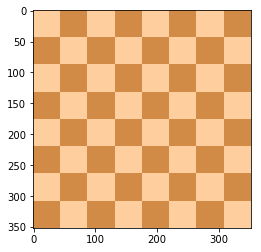

In [84]:
plt.imshow(flat_chess)

In [85]:
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

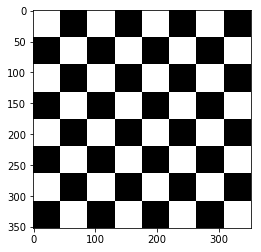

In [87]:
plt.imshow(gray_flat_chess, 'gray')

In [88]:
real_chess = cv2.imread('../../Data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

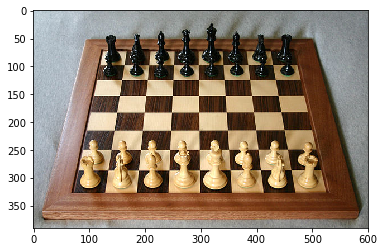

In [89]:
plt.imshow(real_chess)

In [90]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

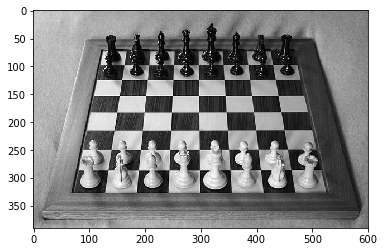

In [91]:
plt.imshow(gray_real_chess,'gray')

In [92]:
# Convert the gray scale image to float values
gray = np.float32(gray_flat_chess)

In [93]:
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [94]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [95]:
dst = cv2.dilate(dst,None)

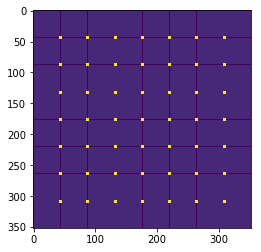

In [96]:
plt.imshow(dst)

In [97]:
#0.01 is the 1 of 100%, 
flat_chess[dst>0.01*dst.max()] = [255,0,0] #RGB

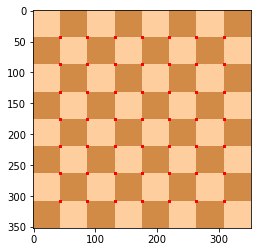

In [98]:
plt.imshow(flat_chess)

**REAL CHEES**

In [99]:
gray_real = np.float32(gray_real_chess)

In [100]:
dst_real = cv2.cornerHarris(src=gray_real,blockSize=2,ksize=3,k=0.04)

In [101]:
real_chess[dst_real>0.01*dst_real.max()]  = [255,0,0] 

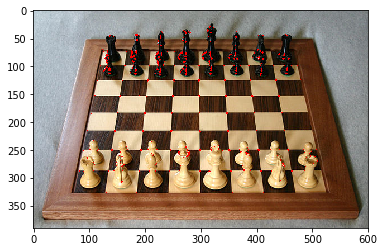

In [102]:
plt.imshow(real_chess)


**SHI-Tomasi Corner Detector**


In [42]:
real_chess = cv2.imread('../../Data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('../../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

In [24]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,10,0.01,10)

In [25]:
corners = np.int0(corners)

In [26]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

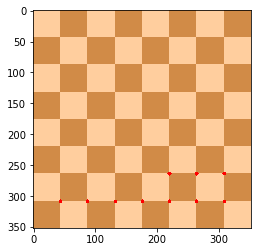

In [27]:
plt.imshow(flat_chess)

In [43]:
corners_real = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

In [44]:
corners_real = np.int0(corners_real)

In [45]:
for i in corners_real:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)

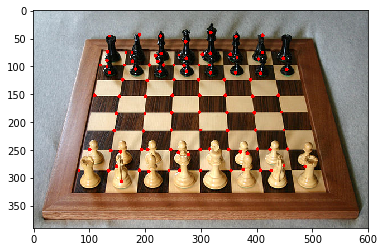

In [46]:
plt.imshow(real_chess)